In [1]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../Resources/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [3]:
trim_data = data[["YearStart", "LocationAbbr", "LocationDesc", "Question", "Data_Value", "Age(years)", "Education",
                     "Race/Ethnicity", "Gender", "Income", "Total", "StratificationCategory1", "StratificationCategoryId1", "StratificationID1"]]

In [4]:
trim_data = trim_data.loc[(trim_data["Question"] == "Percent of adults aged 18 years and older who have obesity")]

In [5]:
overall_data = trim_data[["YearStart", "LocationAbbr", "LocationDesc", "Data_Value", "Total"]]

In [6]:
year_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
df_list = ["obes_2011", "obes_2012", "obes_2013", "obes_2014", "obes_2015", "obes_2016", "obes_2017", "obes_2018"]

In [7]:
df_3d = overall_data.loc[((overall_data["YearStart"] == 2011) | (overall_data["YearStart"] == 2013)
                        | (overall_data["YearStart"] == 2016) | (overall_data["YearStart"] == 2018))
                        & (overall_data["LocationDesc"] != "District of Columbia") 
                        & (overall_data["LocationDesc"] != "Puerto Rico") 
                        & (overall_data["LocationDesc"] != "Guam")
                        & (overall_data["LocationDesc"] != "Virgin Islands")
                        & (overall_data["LocationDesc"] != "National")]
df_3d = df_3d.dropna()

In [8]:
df_3d = df_3d.sort_values(["LocationAbbr", "YearStart"])

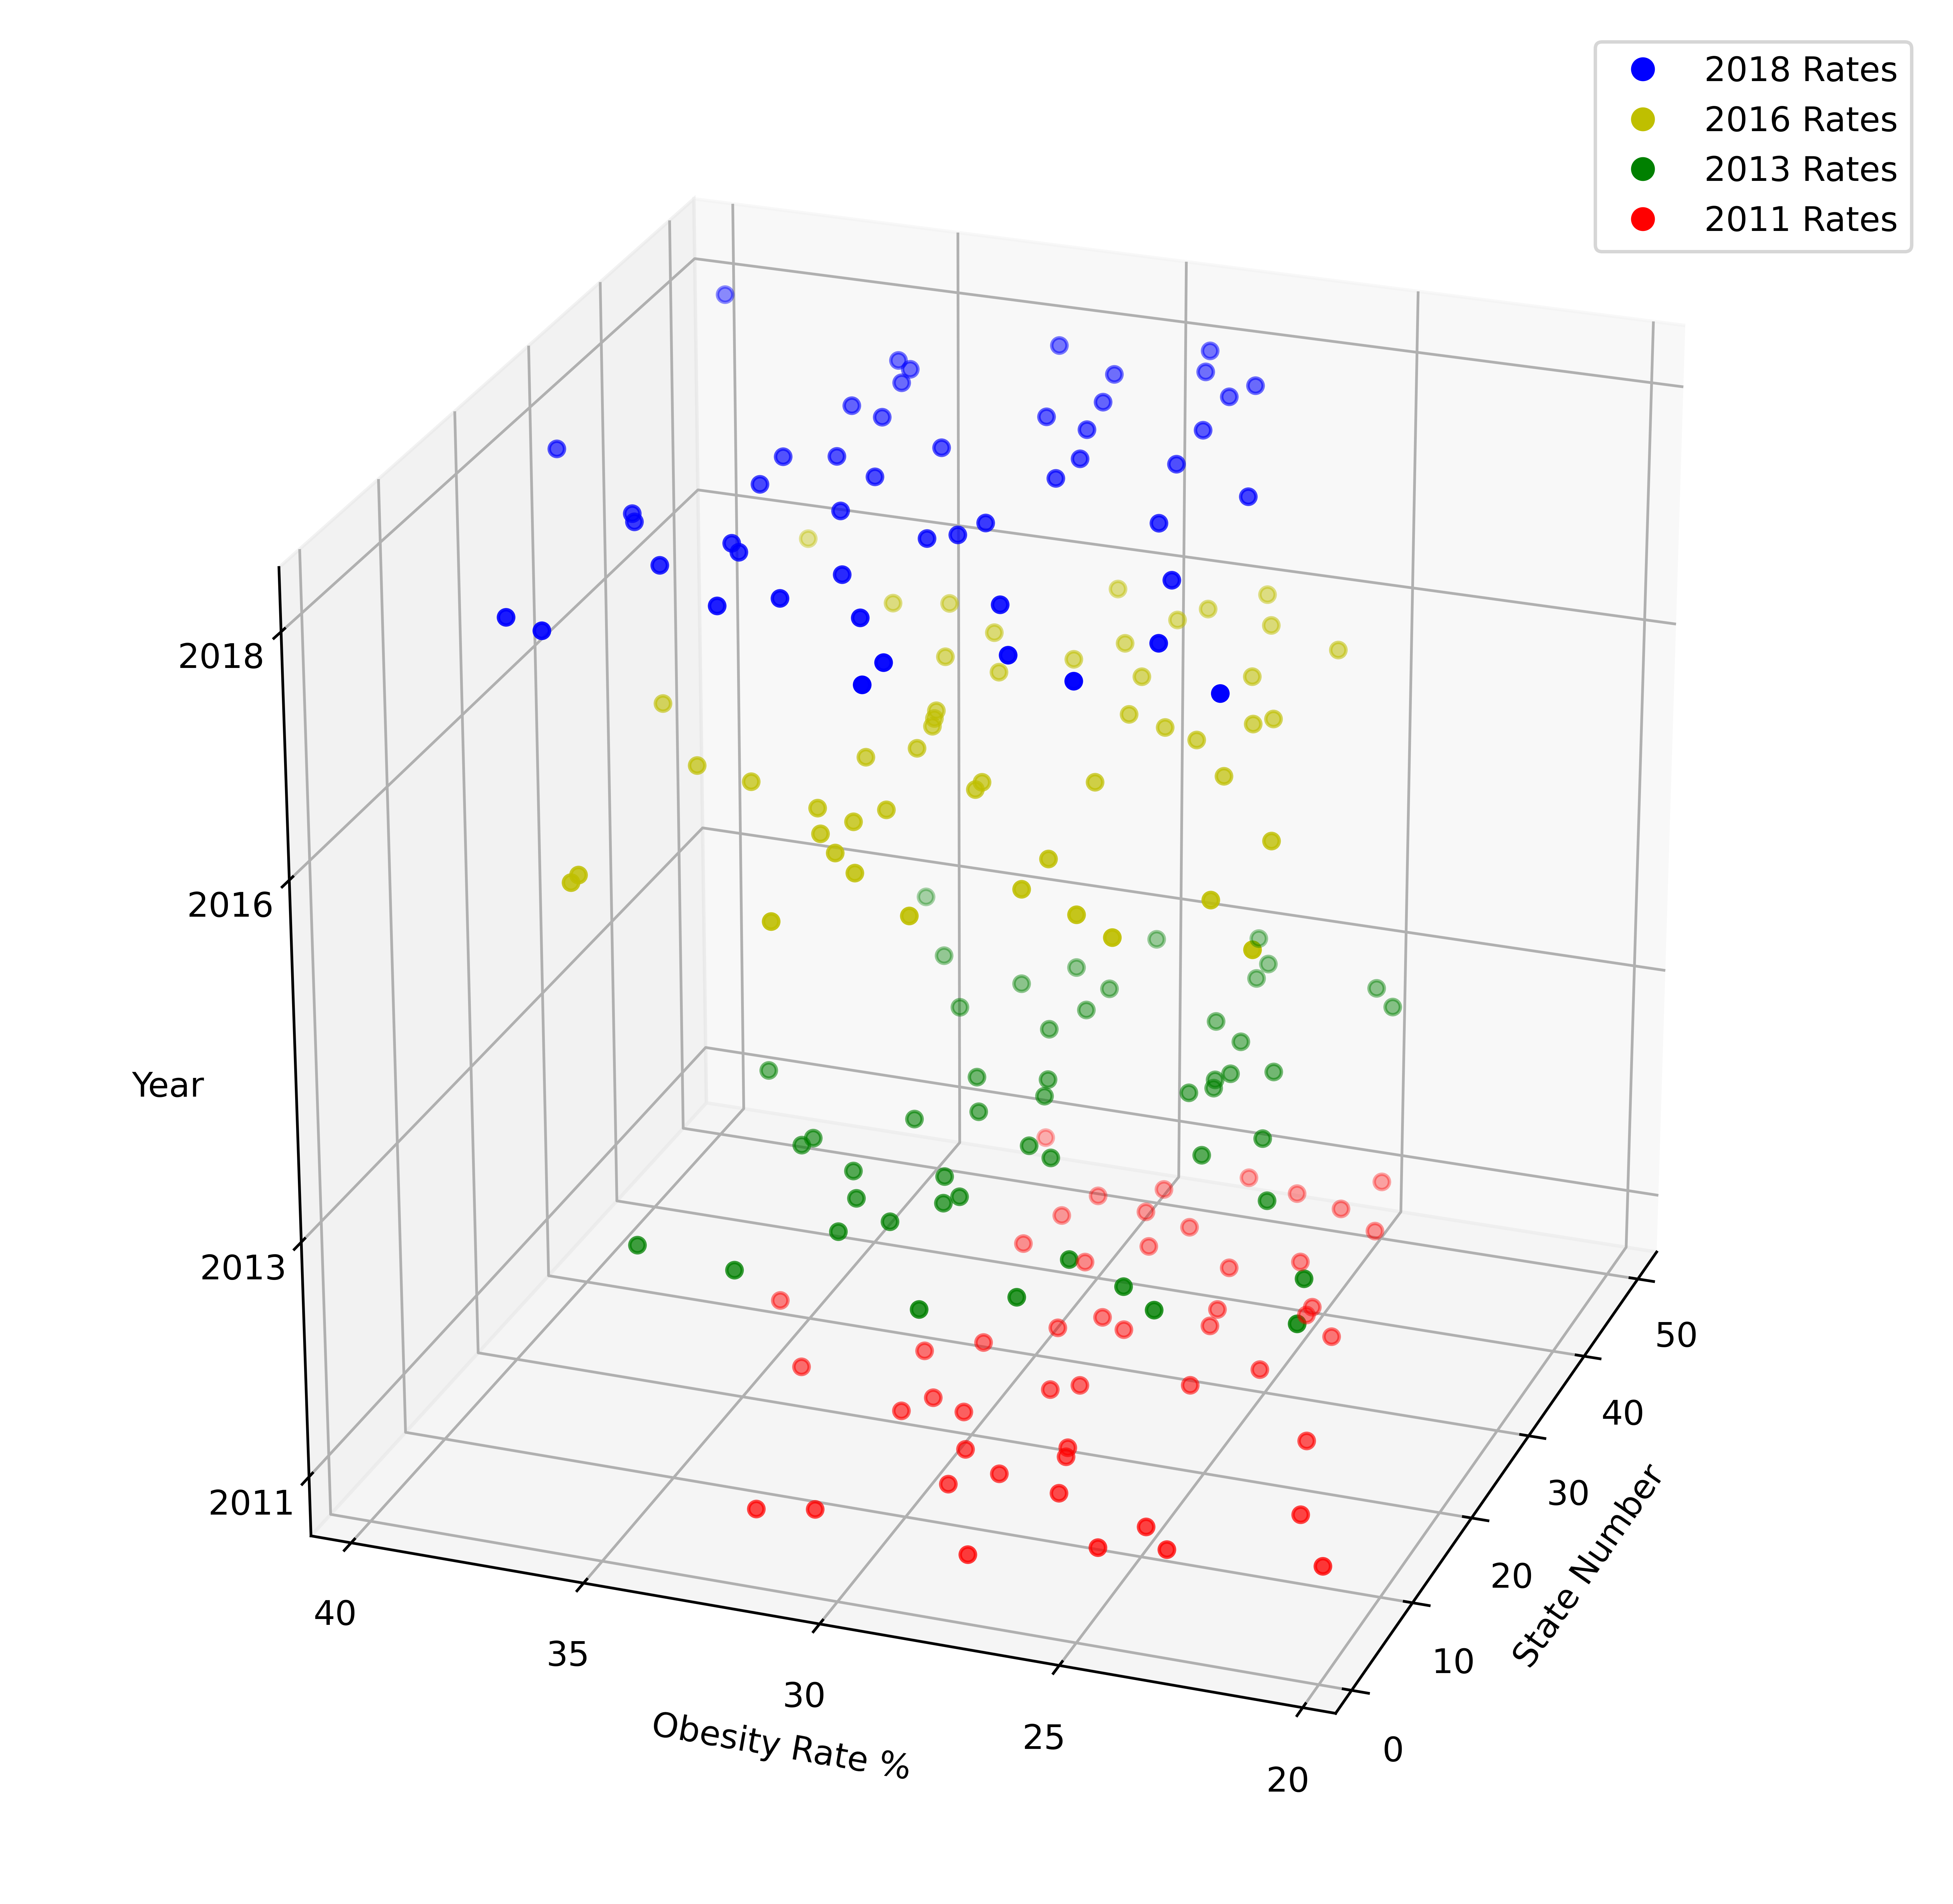

In [9]:
# Create figure object
fig = plt.figure(figsize=(10,10), dpi=800)

# Setup plot axes
ax = fig.gca(projection='3d')

# Define colors as red, green, blue
colors = ['r', 'g', 'y','b']

# Sort the rows by State and Year
df_3d = df_3d.sort_values(["LocationAbbr", "YearStart"])

# Assign colors to data points according to year
c_list = []
for i,value in enumerate(df_3d["YearStart"]):
    if value == 2011:
        c_list.append(colors[0])
    elif value == 2013:
        c_list.append(colors[1])
    elif value == 2016:
        c_list.append(colors[2])
    elif value == 2018:
        c_list.append(colors[3])

# Create a list to add to the dataframe to stand in for State (can't use strings)
state_list = []
state_list = list(range(1, 51))
state_list = state_list * 4
state_list = sorted(state_list)

# Add the list to the dataframe
df_3d["State#"] = state_list
df_3d

# Assemble Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2018 Rates',markerfacecolor='b', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='2016 Rates',markerfacecolor='y', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='2013 Rates',markerfacecolor='g', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='2011 Rates',markerfacecolor='r', markersize=8)]

# Add legend to plot
ax.legend(handles=legend_elements, loc='best')

# Label axes
plt.xlabel("State Number")
plt.ylabel("Obesity Rate %")
ax.set_zlabel("Year")

# Set tick marks
plt.yticks((20, 25, 30, 35, 40))
ax.set_zticks((2011, 2013, 2016, 2018))

# Add axes to the plot
ax.scatter(df_3d["State#"], df_3d["Data_Value"], df_3d["YearStart"], c=c_list)

# Rotate the plot for a better viewing angle
ax.view_init(25, 200)

# Save the plot
plt.savefig("3dplot")

# Display the plot
plt.show()